In [275]:
#Necessary libraries
import numpy as np #handling multi-dimensional arrays
import pandas as pd #handling arrays & dataframes

from sklearn.preprocessing import LabelEncoder #to convert categorical attributes to numerical

import seaborn as sns   # visualization
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,multilabel_confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy.testing as npt 

# 1a. Import all the given datasets and explore shape and size of each.

In [276]:
#1. Reading the data as a data frame
data1 = pd.read_csv(r'D:\python\GL\3.MachineLearning_Intro2SupervisedLearingProject\Part2 - Data1.csv')
data2 = pd.read_csv(r'D:\python\GL\3.MachineLearning_Intro2SupervisedLearingProject\Part2 - Data2.csv')

In [277]:
data2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [278]:
#data_n["Class"].unique()#finding all unique class names
#data2.info()
data1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

# 1b.Merge all datasets onto one and explore final shape and size.

In [279]:
#data_n["Class"]="Normal"#assigning single name for mutiple class name
df = pd.concat([data1, data2.iloc[:,1:]], axis=1)
df.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [280]:
df.shape

(5000, 14)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [282]:
df.describe().transpose()#for statistical analysis

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


# 2b. Explore for null values in the attributes and if required drop or impute values.

In [283]:
df.isna().sum()#to find the NaN occurance counts in each coloumn

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [284]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [285]:
df["LoanOnCard"].unique()#finding all unique class names

array([nan,  1.,  0.])

In [286]:
#df.replace('?',np.NaN,inplace=True)
#print(df['LoanOnCard'].isna().sum())
imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
idf=pd.DataFrame(imp.fit_transform(df))
idf.columns=df.columns
idf.index=df.index

#print(idf['LoanOnCard'].isna().sum())
#ne = (idf != df).any(1)
#print(ne)

In [287]:
idf["LoanOnCard"].unique()

array([0., 1.])

In [288]:
df=idf.copy()
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   float64
 1   Age                  5000 non-null   float64
 2   CustomerSince        5000 non-null   float64
 3   HighestSpend         5000 non-null   float64
 4   ZipCode              5000 non-null   float64
 5   HiddenScore          5000 non-null   float64
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   float64
 8   Mortgage             5000 non-null   float64
 9   Security             5000 non-null   float64
 10  FixedDepositAccount  5000 non-null   float64
 11  InternetBanking      5000 non-null   float64
 12  CreditCard           5000 non-null   float64
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(14)
memory usage: 547.0 KB


# comment:  SimpleImputer converted int type to float 

# 2a.Explore and if required correct the datatypes of each attribute

In [289]:
#df['LoanOnCard'] = df['LoanOnCard'].astype(int) 
#df.info()

In [290]:
max_occurance_value = df["LoanOnCard"].value_counts().idxmax()

In [291]:
max_occurance_value

0.0

In [292]:
df_new = df[df['LoanOnCard']==np.NaN]
#df_new = df[df['Pid'] == 'p01'] 

In [293]:
#imp = SimpleImputer(missing_values='NaN', strategy='mean')
#dft=imp.fit(df) 
df.replace(np.NaN, max_occurance_value, inplace=True)
df["LoanOnCard"].unique()

array([0., 1.])

In [294]:
df['LoanOnCard'] = df['LoanOnCard'].astype(np.int64) 

# 3a. Perform detailed statistical analysis on the data.

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   float64
 1   Age                  5000 non-null   float64
 2   CustomerSince        5000 non-null   float64
 3   HighestSpend         5000 non-null   float64
 4   ZipCode              5000 non-null   float64
 5   HiddenScore          5000 non-null   float64
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   float64
 8   Mortgage             5000 non-null   float64
 9   Security             5000 non-null   float64
 10  FixedDepositAccount  5000 non-null   float64
 11  InternetBanking      5000 non-null   float64
 12  CreditCard           5000 non-null   float64
 13  LoanOnCard           5000 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 547.0 KB


In [296]:
df.describe().transpose()#for statistical analysis

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


# converting float to object type as it is of categorical variable

In [297]:
df['HiddenScore'] = df['HiddenScore'].astype(str) 
df['Level'] = df['Level'].astype(str) 
df['Security'] = df['Security'].astype(str) 
df['FixedDepositAccount'] = df['FixedDepositAccount'].astype(str) 
df['InternetBanking'] = df['InternetBanking'].astype(str) 
df['CreditCard'] = df['CreditCard'].astype(str) 
df['LoanOnCard'] = df['LoanOnCard'].astype(str) 


In [298]:
df_cols = df.columns
#df.iloc[:,4].unique()
df[df_cols[0]].unique()

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   float64
 1   Age                  5000 non-null   float64
 2   CustomerSince        5000 non-null   float64
 3   HighestSpend         5000 non-null   float64
 4   ZipCode              5000 non-null   float64
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   float64
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           5000 non-null   object 
dtypes: float64(7), object(7)
memory usage: 547.0+ KB


In [300]:
#df.drop
df["LoanOnCard"].dtype == 'O'

True

# 3b. Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

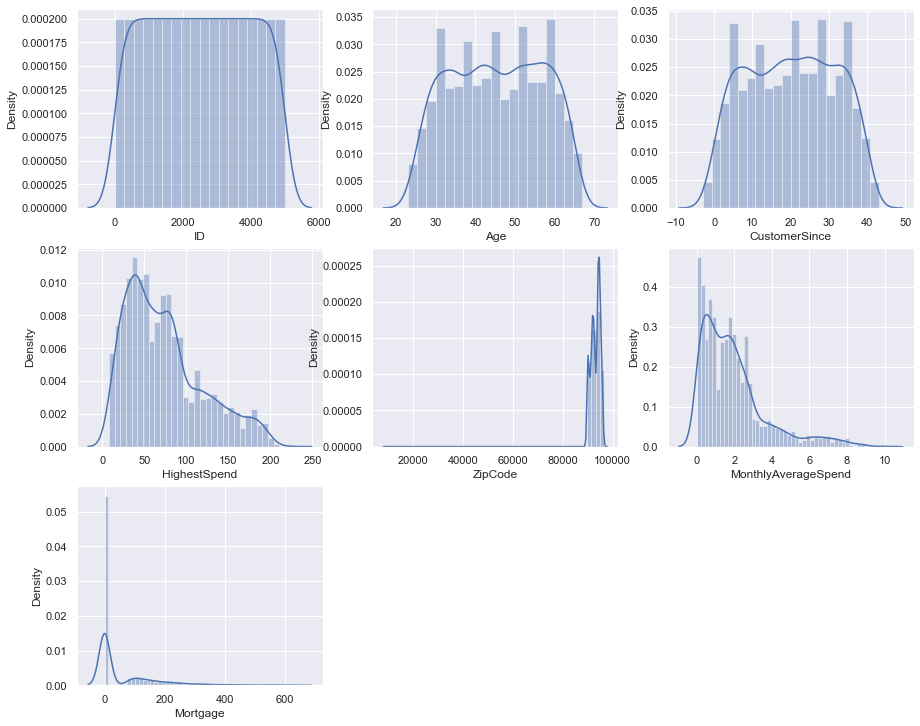

In [301]:
#  Numerical Data
a = 7  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,30))

for i in df.columns:
    if (c<15) & (df[i].dtype != 'O'):
        plt.subplot(a, b, c)
        #plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.distplot(df[i], kde=True)
        c = c + 1

plt.show()

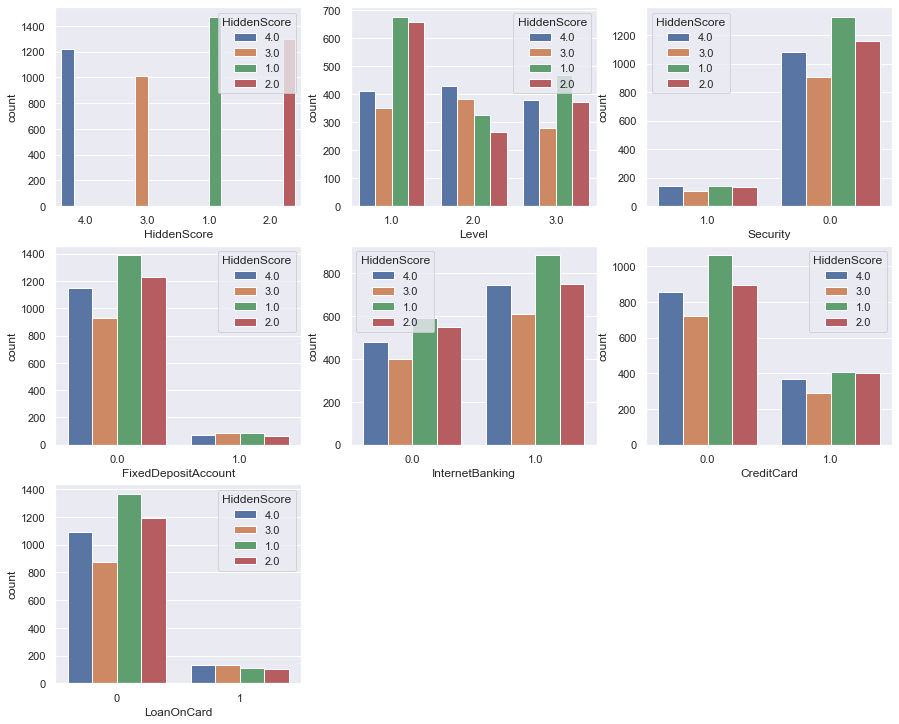

In [302]:
#  Categorical Data
a = 7  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,30))

for i in df.columns:
    if (c<15) & (df[i].dtype == 'O'):
        plt.subplot(a, b, c)
        #plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        #sns.count(df[i], color='lightblue')
        sns.countplot(x=i, hue="HiddenScore", data=df)
        c = c + 1

plt.show()

From count plot we can see the distribution of of categorical 'LoanOnCard' columns. 1 class count is of 480 & 0 class count is of 4520 . Therefore, we need to balance the target 

In [303]:
for colname in df.columns:
    print("\nskew of ", colname, " : ", df[colname].skew()) #compute skew value for particular coloumn



skew of  ID  :  0.0

skew of  Age  :  -0.02934068151284029

skew of  CustomerSince  :  -0.026324688402384513

skew of  HighestSpend  :  0.8413386072610816

skew of  ZipCode  :  -12.500221098132892

skew of  HiddenScore  :  0.15522066944367582

skew of  MonthlyAverageSpend  :  1.5984433366678663

skew of  Level  :  0.22709331566088503

skew of  Mortgage  :  2.1040023191079444

skew of  Security  :  2.588268372959341

skew of  FixedDepositAccount  :  3.6917137984151887

skew of  InternetBanking  :  -0.3947853269234487

skew of  CreditCard  :  0.9045894514231758

skew of  LoanOnCard  :  2.743606655894059


Measure of skewness of age, customersince, zipcode & InternetBanking shows -ive skewness, other all parameters are +ive skewed. LoanOnCard, Mortage & Security need to be transformed as these parameters as very much skewed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

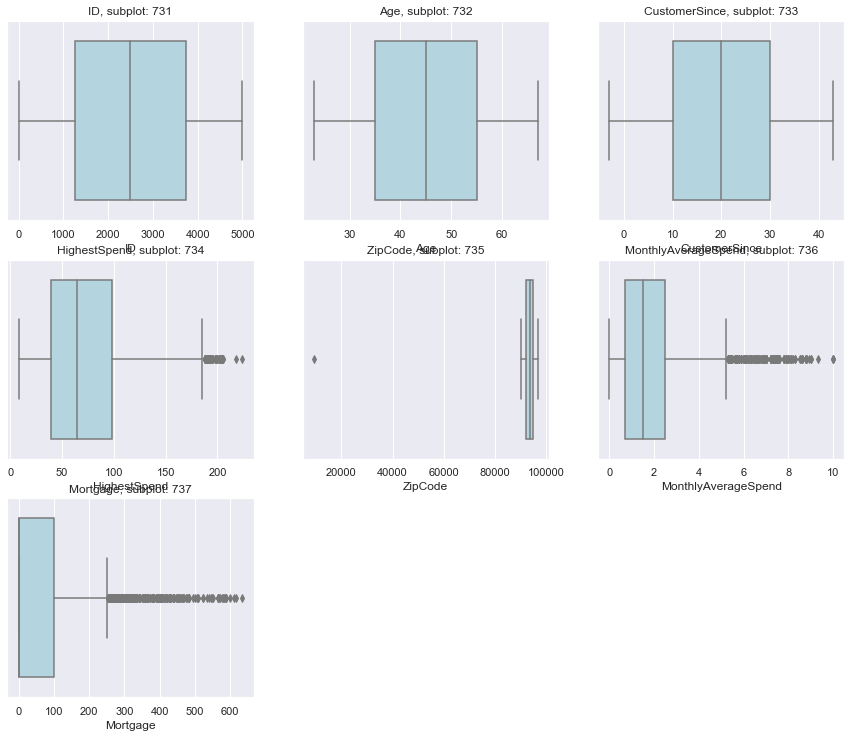

In [158]:
#  Numerical Data
a = 7  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,30))

for i in df.columns:
    if (c<15) & (df[i].dtype != 'O'):
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        #plt.xlabel(i)
        sns.boxplot(df[i], color='lightblue')
        c = c + 1

plt.show()


In [304]:
Q1 = df.quantile(0.25) #getting 25% quantile value for each coloumn
Q3 = df.quantile(0.75) #getting 75% quantile value for each coloumn
IQR = Q3 - Q1 #Inter quantile range 

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() #compute the count of outliers in each coloumn

Age                      0
CreditCard               0
CustomerSince            0
FixedDepositAccount      0
HiddenScore              0
HighestSpend            96
ID                       0
InternetBanking          0
Level                    0
LoanOnCard               0
MonthlyAverageSpend    324
Mortgage               291
Security                 0
ZipCode                  1
dtype: int64

From boxplot it is evident that most of parameters has very less outliers compared with total records. we may try to solve the problem later by  eliminating outliers.

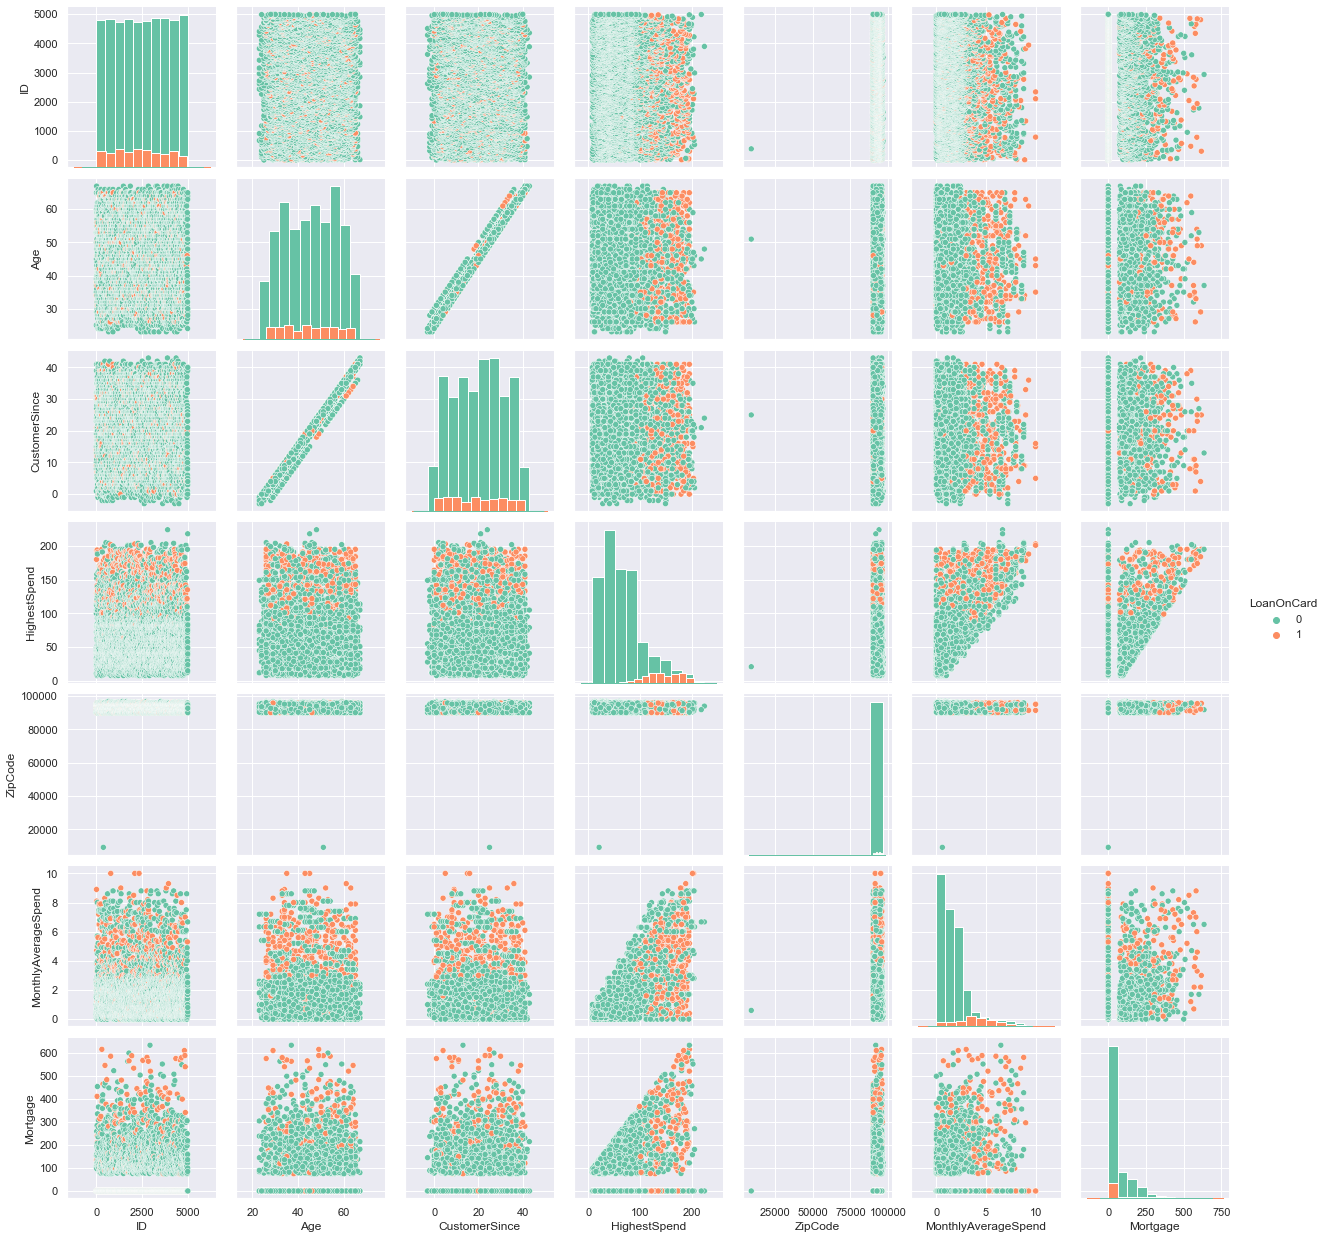

In [165]:
g=sns.pairplot(df,hue="LoanOnCard", palette="Set2")  #pairplot
g=g.map_diag(plt.hist, edgecolor="w")
#sns.pairplot(df.iloc[:, 0:6],hue="Class", palette="Set2")  #pairplot
plt.show()

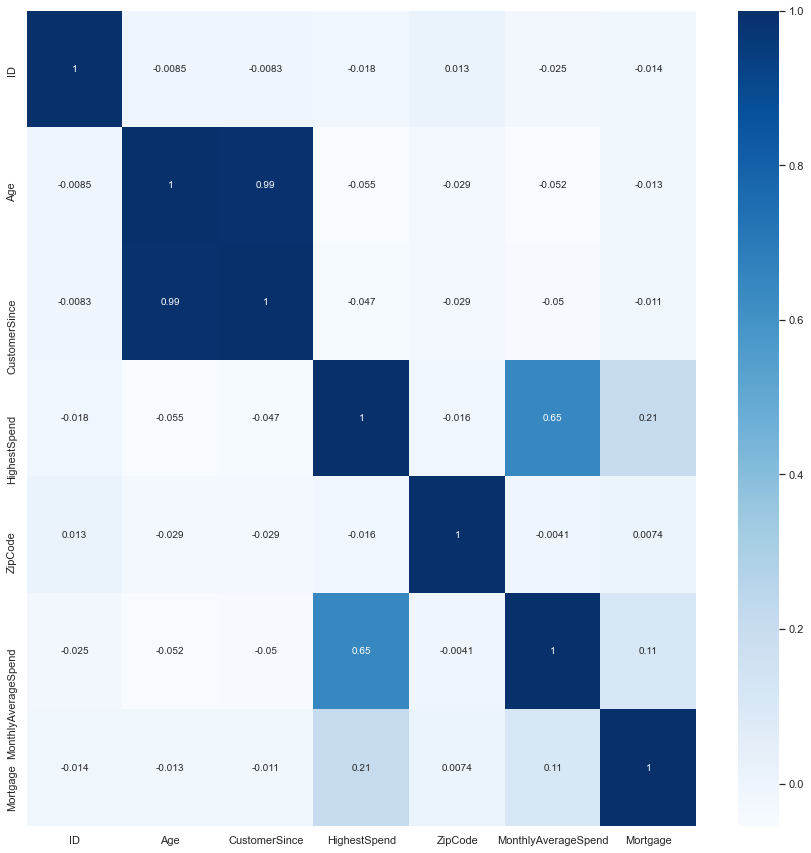

In [305]:
df_corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()

From pair plot we can visualize how different attributes are correlated w.r.t others and itself. The attributes with +/-ive correlation with other attributes are be useful for further processing as it might contribute to predication. The correlation values between attributes can be computed through corr method.

In [306]:
df.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

# 4a. Segregate predictors vs target attributes

In [307]:
X = df.drop(labels= ["ID","LoanOnCard"] , axis = 1)
y = df["LoanOnCard"]

# 4b. Check for target balancing and fix it if found imbalanced.

In [308]:
smt = SMOTE()# though interpolation of records w.r.t to targets, we are applying oversampling to equal number of records to all targets
X, y = smt.fit_resample(X, y)# to avoid imbalanced classification

# 4c. Perform train-test split.

In [309]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [310]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train )#scale the attributes and get the transform
X_test = scaler.transform( X_test )#apply the scaling transform obtained through training records to testing records 

In [311]:
#tmp = pd.DataFrame(X_train)
#tmp.describe().transpose()

In [312]:
counter = Counter(y_train)# to get the count of distinct targets
print(counter)

Counter({'0': 3170, '1': 3158})


In [313]:
#smt = SMOTE()# though interpolation of records w.r.t to targets, we are applying oversampling to equal number of records to all targets
#X_train, y_train = smt.fit_resample(X_train, y_train)# to avoid imbalanced classification

In [314]:
counter = Counter(y_train)# to get the count of distinct targets
print(counter)

Counter({'0': 3170, '1': 3158})


In [315]:
counter = Counter(y_test)# to get the count of distinct targets
print(counter)

Counter({'1': 1362, '0': 1350})


# 5a. Design and train a Logistic regression 

In [316]:
# Fit the model on train
lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)
#predict on test
y_predict_test = lrmodel.predict(X_test)
y_predict_train = lrmodel.predict(X_train)

coef_df = pd.DataFrame(lrmodel.coef_)
coef_df['intercept'] = lrmodel.intercept_
print(coef_df)

          0         1          2         3        4         5         6  \
0 -0.630727  0.570918  11.635453  0.068488  1.99389  2.137865  3.083755   

          7         8         9        10        11  intercept  
0  0.024022 -0.942119  4.126363 -0.707075 -0.921573  -8.405919  


# 5b. Display the classification accuracies for train and test data.

In [317]:
model_score_train = lrmodel.score(X_train, y_train)
print("model_score_train :", model_score_train)

model_score_train : 0.9156131479140329


In [318]:
model_score_test = lrmodel.score(X_test, y_test)
print("model_score_test :", model_score_test)

model_score_test : 0.915929203539823


# 5C. Display and explain the classification report in detail.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

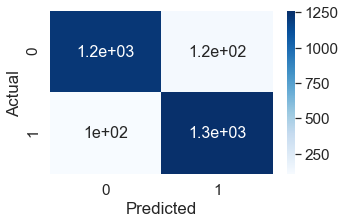

In [319]:
cm=metrics.confusion_matrix(y_test, y_predict_test)
df_cm = pd.DataFrame(cm, columns=np.unique(y), index = np.unique(y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

The confusion matrix

True Positives (TP): we correctly predicted that to give loan is 1200

True Negatives (TN): we correctly predicted that not to give loan is 1200

False Positives (FP): we incorrectly predicted that they to give loan (a "Type I error") 150 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they not to give loan (a "Type II error") 180 Falsely predict negative Type II error

In [320]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1350
           1       0.91      0.92      0.92      1362

    accuracy                           0.92      2712
   macro avg       0.92      0.92      0.92      2712
weighted avg       0.92      0.92      0.92      2712



Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all customer that labeled as will be defaulters & will be no defaulters how many are actually ill be defaulters & will be no defaulters? High precision relates to the low false positive rate. We have got 0.87 & 0.88 precision respectively.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the defaulter that truly defaulters, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

# 5a. Design and train Naive Bayes classifiers.

In [321]:
# creatw the model
nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train.ravel())

GaussianNB()

# 5b. Display the classification accuracies for train and test data.

In [322]:
y_predict_test = nbmodel.predict(X_test)
y_predict_train = nbmodel.predict(X_train)

In [323]:
nbmodel_score_train = nbmodel.score(X_train, y_train)
print("nbmodel_score_train :", nbmodel_score_train)

nbmodel_score_train : 0.8824273072060683


In [324]:
nbmodel_score_test = nbmodel.score(X_test, y_test)
print("nbmodel_score_test :", nbmodel_score_test)

nbmodel_score_test : 0.8779498525073747


# 5c. Display and explain the classification report in detail.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

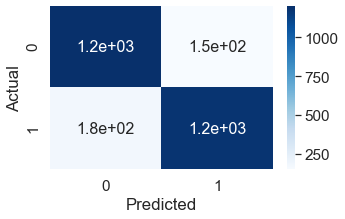

In [325]:
cm=metrics.confusion_matrix(y_test, y_predict_test)
df_cm = pd.DataFrame(cm, columns=np.unique(y), index = np.unique(y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

The confusion matrix

True Positives (TP): we correctly predicted that to give loan is 1200

True Negatives (TN): we correctly predicted that not to give loan is 1200

False Positives (FP): we incorrectly predicted that they to give loan (a "Type I error") 130 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they not to give loan (a "Type II error") 120 Falsely predict negative Type II error

In [326]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1350
           1       0.89      0.87      0.88      1362

    accuracy                           0.88      2712
   macro avg       0.88      0.88      0.88      2712
weighted avg       0.88      0.88      0.88      2712



Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all customer that labeled as will be defaulters & will be no defaulters how many are actually ill be defaulters & will be no defaulters? High precision relates to the low false positive rate. We have got 0.87 & 0.88 precision respectively.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the defaulter that truly defaulters, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

# 5d1.Apply all the possible tuning techniques to train the best model for the given data - LogisticRegression

In [327]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_sel

Best: 0.915611 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.914717 (0.008376) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.914770 (0.008399) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.914770 (0.008399) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.914453 (0.008399) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.914559 (0.008430) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.914822 (0.008017) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.914822 (0.008017) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.913768 (0.008418) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: 

# 5d2.Select the final best trained model with your comments for selecting this model - LogisticRegression

In [328]:
#Setup a knn classifier with k neighbors
lrmodel = LogisticRegression(solver=grid_result.best_params_['solver'], penalty = grid_result.best_params_['penalty'], C = grid_result.best_params_["C"])
lrmodel.fit(X_train, y_train)
#predict on test
y_predict_test = lrmodel.predict(X_test)
y_predict_train = lrmodel.predict(X_train)

In [329]:
model_score_train = lrmodel.score(X_train, y_train)
print("model_score_train :", model_score_train)

model_score_train : 0.915929203539823


In [330]:
model_score_test = lrmodel.score(X_test, y_test)
print("model_score_test :", model_score_test)

model_score_test : 0.9148230088495575


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

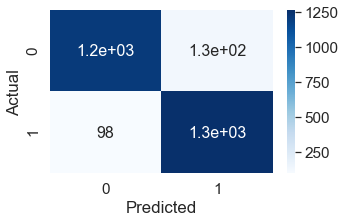

In [331]:
cm=metrics.confusion_matrix(y_test, y_predict_test)
df_cm = pd.DataFrame(cm, columns=np.unique(y), index = np.unique(y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

The confusion matrix

True Positives (TP): we correctly predicted that to give loan is 1200

True Negatives (TN): we correctly predicted that not to give loan is 1300

False Positives (FP): we incorrectly predicted that they to give loan (a "Type I error") 130 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they not to give loan (a "Type II error") 110 Falsely predict negative Type II error

In [332]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1350
           1       0.90      0.93      0.92      1362

    accuracy                           0.91      2712
   macro avg       0.92      0.91      0.91      2712
weighted avg       0.92      0.91      0.91      2712



Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all customer that labeled as will be defaulters & will be no defaulters how many are actually ill be defaulters & will be no defaulters? High precision relates to the low false positive rate. We have got 0.92 & 0.91 precision respectively.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the defaulter that truly defaulters, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

# 5d1.Apply all the possible tuning techniques to train the best model for the given data - Naive Bayes classifiers

In [333]:
# define models and parameters
modelNB = GaussianNB()
smooth = [np.logspace(0,-9, num=100)]
grid = dict(var_smoothing = smooth)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=modelNB, 
                 param_grid=params_NB, 
                 cv=cv,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
Best: 0.912662 using {'var_smoothing': 1.0}
0.912662 (0.011184) with: {'var_smoothing': 1.0}
0.911978 (0.011002) with: {'var_smoothing': 0.8111308307896871}
0.909713 (0.010227) with: {'var_smoothing': 0.657933224657568}
0.906868 (0.009698) with: {'var_smoothing': 0.533669923120631}
0.904972 (0.010314) with: {'var_smoothing': 0.43287612810830584}
0.902234 (0.011254) with: {'var_smoothing': 0.3511191734215131}
0.899863 (0.010581) with: {'var_smoothing': 0.2848035868435802}
0.896808 (0.010354) with: {'var_smoothing': 0.23101297000831597}
0.893701 (0.010782) with: {'var_smoothing': 0.1873817422860384}
0.891594 (0.010273) with: {'var_smoothing': 0.15199110829529336}
0.890066 (0.010355) with: {'var_smoothing': 0.12328467394420659}
0.888960 (0.010405) with: {'var_smoothing': 0.1}
0.888222 (0.010882) with: {'var_smoothing': 0.08111308307896872}
0.886589 (0.011383) with: {'var_smoothing': 0.0657933224657568}
0.885114 (0.011195) wi

# 5d2.Select the final best trained model with your comments for selecting this model - Naive Bayes classifiers

In [334]:
nbmodel = GaussianNB(var_smoothing = grid_result.best_params_['var_smoothing'] )
nbmodel.fit(X_train, y_train.ravel())

GaussianNB(var_smoothing=1.0)

In [335]:
y_predict_test = nbmodel.predict(X_test)
y_predict_train = nbmodel.predict(X_train)

In [336]:
nbmodel_score_train = nbmodel.score(X_train, y_train)
print("nbmodel_score_train :", nbmodel_score_train)

nbmodel_score_train : 0.9129266750948167


In [337]:
nbmodel_score_test = nbmodel.score(X_test, y_test)
print("nbmodel_score_test :", nbmodel_score_test)

nbmodel_score_test : 0.9037610619469026


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

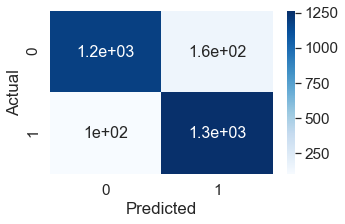

In [338]:
cm=metrics.confusion_matrix(y_test, y_predict_test)
df_cm = pd.DataFrame(cm, columns=np.unique(y), index = np.unique(y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

The confusion matrix

True Positives (TP): we correctly predicted that to give loan is 1200

True Negatives (TN): we correctly predicted that not to give loan is 1200

False Positives (FP): we incorrectly predicted that they to give loan (a "Type I error") 150 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they not to give loan (a "Type II error") 120 Falsely predict negative Type II error

In [339]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1350
           1       0.89      0.93      0.91      1362

    accuracy                           0.90      2712
   macro avg       0.90      0.90      0.90      2712
weighted avg       0.90      0.90      0.90      2712



Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all customer that labeled as will be defaulters & will be no defaulters how many are actually ill be defaulters & will be no defaulters? High precision relates to the low false positive rate. We have got 0.91 & 0.89 precision respectively.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the defaulter that truly defaulters, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

# 6a. Write your conclusion on the results.

we have tried with logistic regression and its train & test accuracy are 91 97% both. But after tuning the parameters also we are getting the same percentage. 

Same way, with naive bayes train and test accuracy are 87% both. But after tuning the parameters we get better accuracy of 91% for train & 90% for test accuracy. 

Final conclusion is, after tuning both logistic and naive bayes perform same for given data set, with logistic regression over take naive bayes by .5%.

# 6b.Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future

We can use polynomial features to expand the attributes and test the accuracy

We can try removing outliers and check our results

Getting balanced data might improve the results

Also, adding more new attribtues might help in better prediction

In order to have more accurate predictions in your test data, you will need to have optimal parameters. This is obtained by using GridSearchCV, found in Scikit-learn model_selection. It also provided 90% accuracy for test set in both the methods.